In [1]:
import pandas as pd
from pydqc import infer_schema, data_summary, data_compare, data_consist
# 将上面4个函数中的
# from sklearn.externals.joblib import Parallel, delayed
# 修改为
# from joblib import Parallel, delayed

该package最后更新时间为2018年，可能不再维护了，更推荐使用pandas-profiling(已更新为ydata-profiling)进行数据探索
- 使用data_summary查看数据概况(比如字段空值率，unique的数量，数值类型字段的最小（大）值，中位数，平均数)
- 使用data_compare查看不同组之间的差异（比如查看正负样本在同一字段上的不同表现）
- 使用data_consist查看同一组在不同时间段的对比差异

In [2]:
input_file = 'D:\\Dev\\Data\\Walmart\\train.csv'
output_dir  = 'D:\\Dev\\Data\\Walmart\\dataExploration\\'

In [3]:
dat = pd.read_csv('D:\\Dev\\Data\\Walmart\\train.csv')

In [4]:
dat.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [5]:
print(dat.shape)

(647054, 7)


### Step1: 使用infer_schema推断表结构，为后续使用提供基础

In [6]:
# 如果数据量比较大，可以设置simple_size参数，例如simple_size=0.1
infer_schema.infer_schema(data=dat, fname='dat20230311', output_root=output_dir, base_schema=None)

In [7]:
# 修改在output_dir目录下生成的schema文件(可能会有一些误判要修正)，并重新命名，例如加后缀mdf

### Step2：使用data_summary生成数据概况

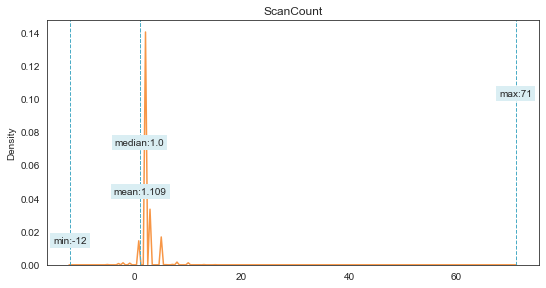

In [8]:
dat_schema = pd.read_excel(output_dir + 'data_schema_dat20230311_mdf.xlsx')
data_summary.data_summary(table_schema=dat_schema, table=dat, fname='dat20230311', output_root=output_dir)
# 会把结果输出到Excel文件中

In [9]:
# data_summary_notebook生成数据概况的python代码（但感觉一般不需要，看上面输出的Excel文件即可）
data_summary.data_summary_notebook(table_schema=dat_schema, table=dat, fname='dat20230311', output_root=output_dir)

### Step3：使用data_compare查看不同组之间的差异

In [10]:
# 这里随机挑选两个组进行对比
dat['TripType'] = dat.TripType.astype(str)
group1 = dat[dat.TripType=='39']
group2 = dat[dat.TripType=='40']
print(group1.shape)
print(group2.shape)

(95504, 7)
(174164, 7)


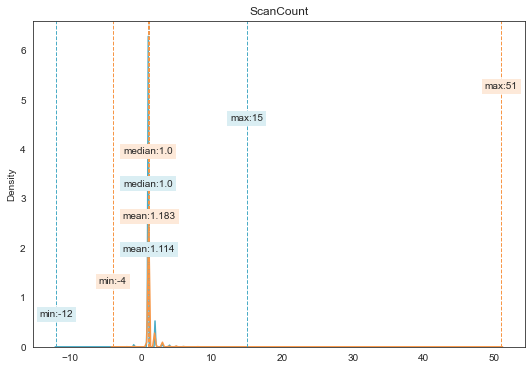

In [11]:
data_compare.data_compare(table1= group1
                          , table2 = group2
                          , schema1 = dat_schema
                          , schema2 = dat_schema
                          , fname = 'dat20230311'
                          , output_root = output_dir
                )

In [12]:
# data_compare_notebook生成对比的代码（但感觉一般不需要，看上面输出的Excel文件即可）
data_compare.data_compare_notebook(table1= group1
                          , table2 = group2
                          , schema1 = dat_schema
                          , schema2 = dat_schema
                          , fname = 'dat20230311'
                          , output_root = output_dir
                )

### Step4: 使用data_consist查看同一组在不同时间段的对比差异

In [13]:
# 这里的数据不适用这个，一般来说group1和group2里面的需要有重复的主键，比如id，通过把这两个集合用主键进行join，
# 然后对比各个字段的一个情况（使用在同一个东西在不同时间段的对比上）
# data_consist.data_consist(table1= group1
#                           , table2 = group2
#                           , key1 = 'id'
#                           , key2 = 'id'
#                           , schema1 = dat_schema
#                           , schema2 = dat_schema
#                           , fname = 'dat20230311'
#                           , output_root = output_dir
#                 )

In [14]:
# data_consist_notebook生成同一组对比的代码（但感觉一般不需要，看上面输出的Excel文件即可）
# data_consist.data_consist_notebook(table1= group1
#                           , table2 = group2
#                           , key1 = 'id'
#                           , key2 = 'id'
#                           , schema1 = dat_schema
#                           , schema2 = dat_schema
#                           , fname = 'dat20230311'
#                           , output_root = output_dir
#                 )